# Creating CNN Using Scratch And Transfer Learning¶

## https://github.com/krishnaik06/Malaria-Detection/blob/master/CNN%20And%20Transfer%20LEarning.ipynb

In [55]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this which will be bigger in size than original which is suited for the model
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [3]:
IMAGE_SIZE+[3]

[224, 224, 3]

In [4]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# 3-RGB channel for colored image. If it black & white image then it will 2
# include_top=False - Remove 1st & last layer. We provide image size in 1st layer & no. of classes(labels) in last layer.

vgg19 = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 12s 0us/step


In [5]:
vgg19.summary() # 1st layer is our image size 224, 224, 3. Last layer is blank instead of 1000 labels as in imagenet

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# don't train existing weights
# We won't retrain each & every layer weights again rather use same weight as in VGG19.
# Retraining should happen only at the last layer.

for layer in vgg19.layers:
    layer.trainable = False

In [9]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [10]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [13]:
vgg19.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [14]:
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [12]:
len(folders)

2

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model=Model(inputs=vgg19.input, outputs=prediction)

In [18]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Applying image augmentation - flip, shear,zoom etc
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size

training_set=train_datagen.flow_from_directory(directory='Dataset/Train',target_size=(244,244),batch_size=32
                                               ,class_mode='categorical')


Found 416 images belonging to 2 classes.


In [22]:
training_set

In [24]:
# Make sure you provide the same target size as initialied for the image size

test_set=test_datagen.flow_from_directory(directory='Dataset/Test',target_size=(244,244),batch_size=32
                                               ,class_mode='categorical')


Found 134 images belonging to 2 classes.


In [80]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit(training_set, validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/10
13/13 [==============================] - 599s 46s/step - loss: 0.3005 - accuracy: 0.8582 - val_loss: 0.3451 - val_accuracy: 0.8433
Epoch 2/10
13/13 [==============================] - 494s 39s/step - loss: 0.2451 - accuracy: 0.9062 - val_loss: 0.3780 - val_accuracy: 0.8284
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.2537 - accuracy: 0.9111 - 1243s 101s/step - loss: 0.2537 - accuracy: 0.9111 - val_loss: 0.3550 - val_accuracy: 0.8060
Epoch 4/10
13/13 [==============================] - 638s 49s/step - loss: 0.2683 - accuracy: 0.8894 - val_loss: 0.4049 - val_accuracy: 0.7836
Epoch 5/10
13/13 [==============================] - 669s 52s/step - loss: 0.2853 - accuracy: 0.8606 - val_loss: 0.4502 - val_accuracy: 0.7164
Epoch 6/10
13/13 [==============================] - 490s 38s/step - loss: 0.2578 - accuracy: 0.8942 - val_loss: 0.3705 - val_accuracy: 0.7910
Epoch 7/10


KeyboardInterrupt: 

In [81]:
r.history

{'loss': [0.4752548038959503, 0.3789883255958557],
 'accuracy': [0.75, 0.8413461446762085],
 'val_loss': [0.4546518325805664, 0.6120035648345947],
 'val_accuracy': [0.7238805890083313, 0.6716417670249939]}

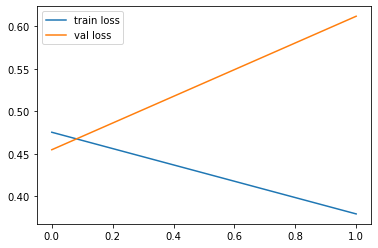

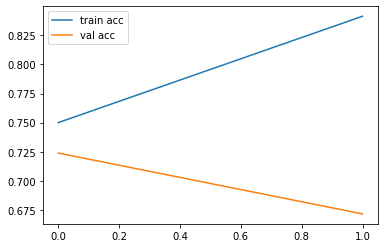

<Figure size 432x288 with 0 Axes>

In [82]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [83]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [84]:
y_pred = model.predict(test_set)

In [85]:
y_pred # 1st folder is at label index 0(Parasite), 2nd folder is at label index 1(Uninfected)

array([[9.99181926e-01, 8.18119152e-04],
       [9.97238278e-01, 2.76168529e-03],
       [9.72061157e-01, 2.79388279e-02],
       [2.36701101e-01, 7.63298929e-01],
       [3.06531161e-01, 6.93468809e-01],
       [2.36595854e-01, 7.63404131e-01],
       [5.57105303e-01, 4.42894697e-01],
       [6.30367577e-01, 3.69632363e-01],
       [6.22881874e-02, 9.37711835e-01],
       [1.41092479e-01, 8.58907521e-01],
       [9.81412411e-01, 1.85875408e-02],
       [9.08370018e-02, 9.09162998e-01],
       [8.91018882e-02, 9.10898089e-01],
       [2.19509080e-01, 7.80490935e-01],
       [1.08946092e-01, 8.91053915e-01],
       [1.25584304e-01, 8.74415696e-01],
       [7.69908056e-02, 9.23009157e-01],
       [9.73344266e-01, 2.66557354e-02],
       [9.51285422e-01, 4.87146229e-02],
       [9.70048428e-01, 2.99516171e-02],
       [1.37931868e-01, 8.62068117e-01],
       [7.76223421e-01, 2.23776594e-01],
       [3.62765491e-01, 6.37234509e-01],
       [8.63622963e-01, 1.36377066e-01],
       [9.833108

In [86]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)

In [87]:
y_pred # 0-Parasite, 1-Uninfected

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1])

## Loading Model

In [88]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [89]:
model = load_model('model_vgg19.h5')

In [90]:
def predict(img):
    x = image.img_to_array(img)
    print('x.shape : ', x.shape)
    x=x/255 # Normalizing
    x=np.expand_dims(x,axis=0)
    print('x.shape after expanding : ', x.shape)
    img_data = preprocess_input(x)
    print('img_data.shape : ', img_data.shape)
    pred = model.predict(img_data)
    print(pred)
    # np.argmax - Returns the indices of the maximum values along an axis.
    # Since 1st folder in train is Parasite, its prediction will be available in index=0, unaffected(2nd folder) in index=1
    if np.argmax(pred,axis=1) == 1:
        print("Uninfected")
    else:
        print("Infected")    

In [91]:
img = image.load_img('Dataset/Test/Uninfected/2.png', target_size=(224,224))

In [92]:
predict(img)

x.shape :  (224, 224, 3)
x.shape after expanding :  (1, 224, 224, 3)
img_data.shape :  (1, 224, 224, 3)
[[0.2298285 0.7701715]]
Uninfected


In [93]:
v = np.argmax(np.array([[0.2,0.8]]),axis=1) # np.argmax - Returns the indices of the maximum values along an axis.
v

array([1])

### Before prediction is wrong since we haven't trained with many images & with multiple epoch 

In [95]:
predict(image.load_img('Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png', target_size=(224,224)))

x.shape :  (224, 224, 3)
x.shape after expanding :  (1, 224, 224, 3)
img_data.shape :  (1, 224, 224, 3)
[[0.23669331 0.76330674]]
Uninfected
